<a href="https://colab.research.google.com/github/doeungim/ADP_DE2/blob/main/ADP_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



## 1Î≤à
#### 1.1 ÌÉêÏÉâÏ†Å Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù ÏàòÌñâ(ÏãúÍ∞ÅÌôî Ìè¨Ìï®)
#### 1.2 Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨(Ïù¥ÏÉÅÍ∞í ÎåÄÏ≤¥Î∞©Ïïà Ï†úÏãú)
#### 1.3 ÏïûÏÑ† Îëê Îã®Í≥ÑÏóêÏÑú ÏñªÏùÄ Ìñ•ÌõÑ Î∂ÑÏÑùÏãú Í≥†Î†§ÏÇ¨Ìï≠ ÏûëÏÑ±

In [1]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/data1.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [23]:
# Í≤∞Ï∏° ÌôïÏù∏
print(df.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


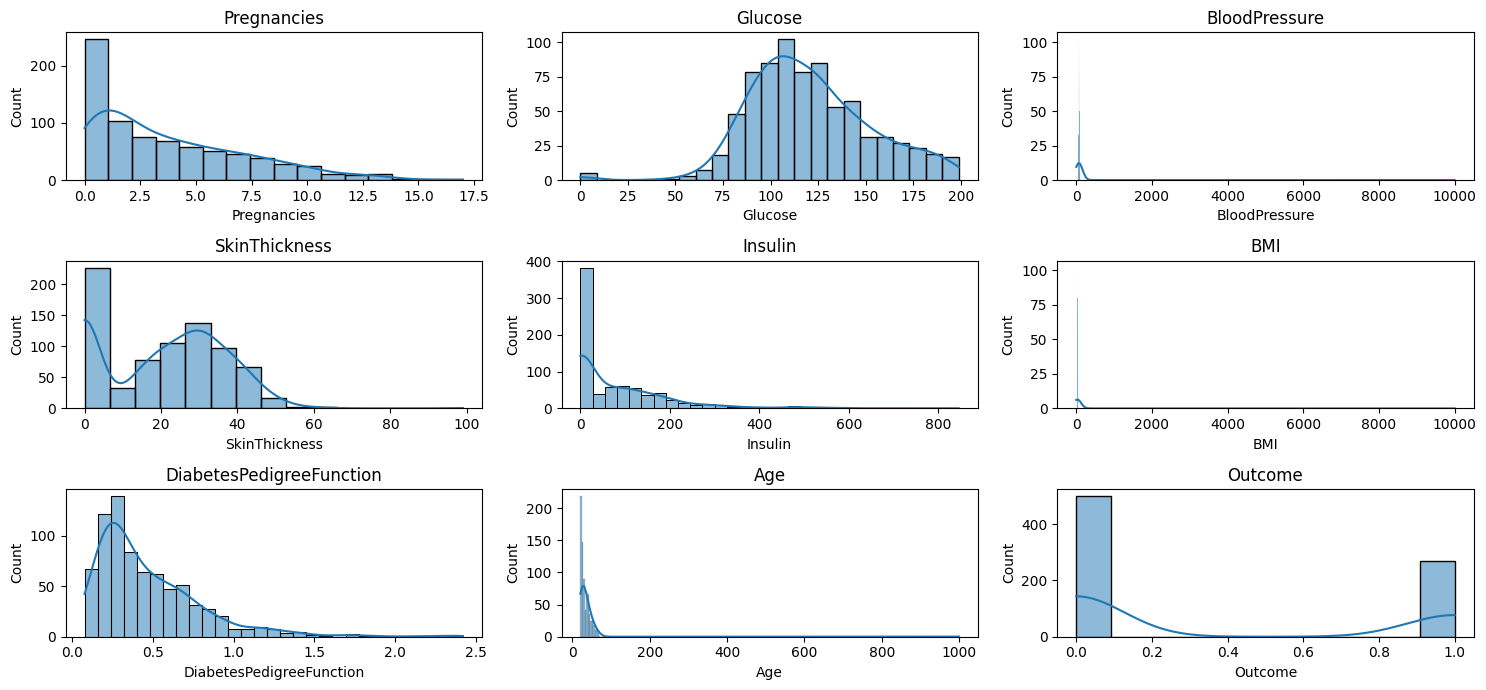

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   81.976562  358.835058   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   44.934766  359.739733   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   34.447917   36.754727  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%      max   Skewness    Kurtosis  
Pregnancies                 3.0000    6.00000    17.00   0.901674    0.159220  
Glucose                   117.0000  140.25000   199.00   0.173754    0.640780  
BloodPressure              72.0000   80.00000  9999.00  27.592196  763.551413  
SkinThickness              23.0000   32.00000    99.00   0.109372   -0.520072  
Insulin                    30.5000  127.25000   846.00   2.272251    7.214260  
BMI                        32.0000   36.60000  9999.00  27.693107  767.271192  
DiabetesPedigreeFunction    0.3725    0.62625     2.42   1.919911    5.594954  
Age                        29.0000   41.00000   999.00  23.650609  620.256035  
Outcome                     0.0000    1.00000     1.00   0.635017   -1.600930

In [14]:
# 1) EDA

cols = df.columns.tolist()

fig, axes = plt.subplots(3,3 , figsize = (15, 7))

for i, axes in enumerate(axes.flat[:len(cols)]) :
  col_i = df[cols].columns[i]
  sns.histplot(df[col_i], kde= True, ax = axes)
  axes.set_title(col_i)



plt.tight_layout()
plt.show()

desc = df.describe().T  # Í∏∞Ï°¥ describe Í≤∞Í≥º (Ìñâ/Ïó¥ Î≥ÄÌôò)

# ÏôúÎèÑÏôÄ Ï≤®ÎèÑ Ï∂îÍ∞Ä
desc["Skewness"] = df.skew()
desc["Kurtosis"] = df.kurtosis()

display(desc)

print("""
EDA ÏàòÌñâ Í≤∞Í≥º
75%ÏôÄ max Í∞íÏùò Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇòÎäî BloodPRessure, BMI, AGE Îç∞Ïù¥ÌÑ∞Ïù∏ Í≤∞Í≥º Í∑πÎã®Ï†ÅÏù∏ Ïù¥ÏÉÅÏπòÍ∞Ä Ï°¥Ïû¨ÌïòÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïó¨, Ïù¥ÏÉÅÏπò Ï†úÍ±∞Í∞Ä ÌïÑÏöîÌï¥Î≥¥ÏûÑ
Insuline, DiabetsPedigreeFunction ÏùÄ Ïò§Î•∏Ï™ΩÏúºÎ°ú ÏπòÏö∞Ïπú Î∂ÑÌè¨Î°ú ÏôúÎèÑÍ∞Ä ÌÅ∞ Î∂ÑÌè¨Î•º Í∞ÄÏßÄÍ≥† ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê, Î°úÍ∑∏ Î≥ÄÌôò ÌòπÏùÄ Box-Cox Î≥ÄÌôòÏù¥ ÌïÑÏöîÌï¥Î≥¥ÏûÑ

""")

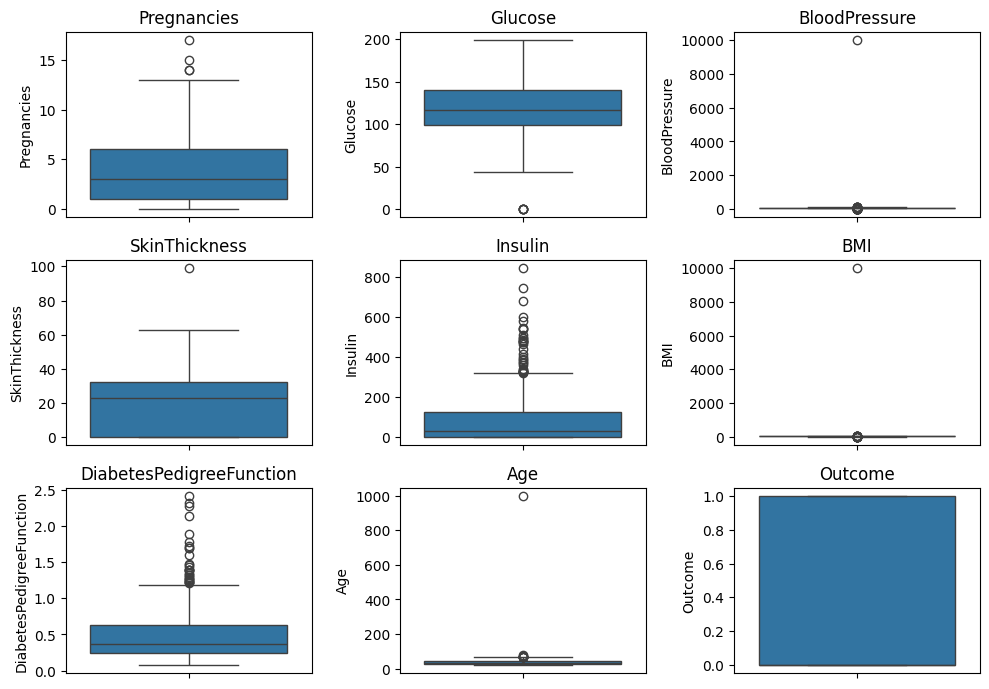

In [19]:
# Ïù¥ÏÉÅÏπò Ï†êÍ≤Ä
cols = df.columns.tolist()

fig, axes = plt.subplots(3,3 , figsize = (10, 7))

for i, axes in enumerate(axes.flat[:len(cols)]) :
  col_i = df[cols].columns[i]
  sns.boxplot(df[col_i], ax = axes)
  axes.set_title(col_i)

plt.tight_layout()
plt.show()


<Axes: >

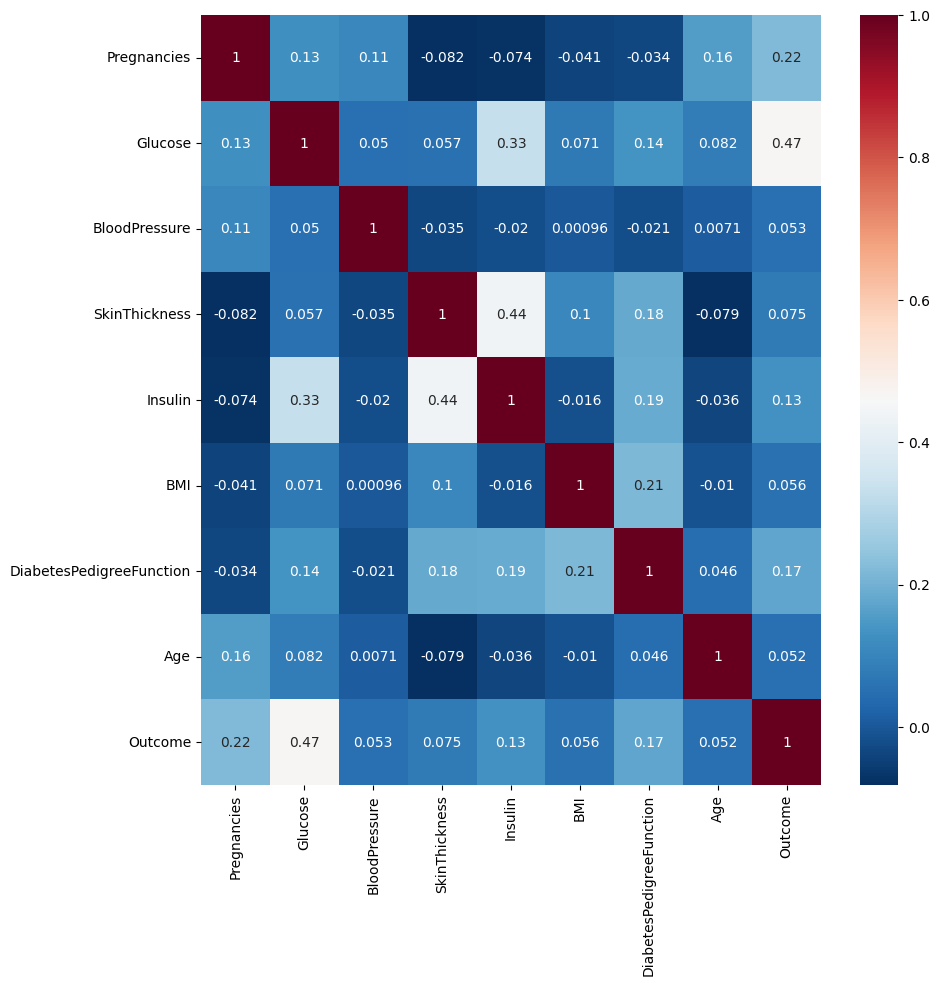

In [22]:
# Ïó∞ÏÜçÏ†ÅÏù∏ Î≥ÄÏàòÏùò Îã§Ï§ë Í≥µÏÑ†ÏÑ±Ïù¥ Ï°¥Ïû¨ÌïòÎäîÏßÄ ÌôïÏù∏ÌïòÍ∏∞ ÏúÑÌï¥ ÏÉÅÍ¥Ä Í¥ÄÍ≥Ñ Í≤ÄÏ†ï

cor_mat = df.corr(method ='pearson')
plt.figure(figsize = (10, 10))

sns.heatmap(cor_mat, cmap = 'RdBu_r', annot = True)

#### 1.2 Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨ (ÎåÄÏ≤¥ Î∞©Ïïà Ï†úÏãú)


In [ ]:
print("""
Ïù¥ÏÉÅÏπò ÌåêÎã® Ïó¨Î∂ÄÎ•º ÌåêÎã®Ìï† ÎïåÏóêÎäî ÏïÑÎûò 4Í∞úÏùò Î∞©Î≤ïÏù¥ ÏûàÎã§.
1) EDS : ÌèâÍ∑† -/+ 3 * ÌëúÏ§ÄÌé∏Ï∞® Î•º Î≤óÏñ¥ÎÇ®
2) Í∏∞ÌïòÌèâÍ∑† -/+ 2.5 ÌëúÏ§ÄÌé∏Ï∞®Î•º Î≤óÏñ¥ÎÇ®
3) IQR : Q1 - 1.5 * IQR < x < Q3 - 1.5 * IQR
4) Íµ∞Ïßë Î∂ÑÏÑùÏùÑ ÌÜµÌïú Ïù¥ÏÉÅÏπò ÏßÑÎã®

Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨ÌïòÎäî Î∞©Î≤ïÏúºÎ°úÎäî Îã§ÏùåÍ≥º Í∞ôÎã§.
1) Ï†àÎã® : Í≤ΩÍ≥ÑÍ∞í ÎÑàÎ¨¥Ïùò Ïù¥ÏÉÅÏπòÎì§ÏùÑ Ï†úÍ±∞ÌïòÎäî Î∞©Î≤ï
2) Ï°∞Ï†ï : Ïù¥ÏÉÅÏπò ÏßÑÎã® Í∏∞Ï§ÄÏóê ÏùòÌï¥ Ï†ïÌï¥ÏßÑ ÏÉÅÌïúÍ≥º ÌïòÌïúÍ±¥ Í∞íÏúºÎ°ú Ï°∞Ï†ïÌïúÎã§. Ï†àÎã®Í≥ºÎäî Îã¨Î¶¨ ÏÜåÏã§Ïù¥ ÏóÜÍ∏∞ ÎïåÎ¨∏Ïóê Ïù¥ÏÉÅÏπò Ï†ÑÌõÑÏùò Îç∞Ïù¥ÌÑ∞ ÌÅ¨ÌÇ§Í∞Ä ÎèôÏùº
3) ÌÅ¥Î¶¨Ìïë : ÏÉÅÌïúÍ∞íÍ≥º ÌïòÌïúÍ∞íÏùÑ ÌäπÏ†ï Í∞íÏúºÎ°ú ÏßÄÏ†ïÌï¥ÏÑú Ìï¥Îãπ Ï†êÏúÑÎ•º Î≤óÏñ¥ÎÇòÎäî Í∞íÏùÑ ÏÉÅÌïú/ÌïòÌïúÍ∞íÏúºÎ°ú Ï°∞Ï†ïÌïòÎäî Î∞©Î≤ïÏù¥Îã§.
4) ÎåÄÏ≤¥ : Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞ÌïòÎäî ÎåÄÏã†, ÌèâÍ∑†, Ï§ëÏïôÍ∞í, ÏµúÎπàÍ∞í ÎòêÎäî ÌöåÍ∑Ä Î™®Îç∏ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÎåÄÏ≤¥ÌïòÎ©∞, KNN-Imputation, Regression ImputationÏù¥ ÏûàÎã§
5) Î°úÍ∑∏ Î≥ÄÌôò : Îç∞Ïù¥ÌÑ∞Ïùò Î∂ÑÌè¨Î•º Ï†ïÍ∑ú Î∂ÑÌè¨Ïóê Í∞ÄÍπùÍ≤å Î≥ÄÌòïÌïòÏó¨ Ïù¥ÏÉÅÏπòÎ•º ÏôÑÌôîÌïòÎäî Î∞©Î≤ï

Îç∞Ïù¥ÌÑ∞Ïùò ÌäπÏÑ±ÏùÑ Î≥ºÎïå, Í∑πÎã®Ï†ÅÏù∏ Ïò§Î•òÍ∞í(Ïòà: 9999, -999, 10000)Í∞Ä ÏûàÎäî Ïª¨ÎüºÎì§ÏùÄ Î™ÖÎ∞±Ìïú Îç∞Ïù¥ÌÑ∞ Ïò§Î•òÏù∏ Í∞ÄÎä•ÏÑ±Ïù¥ Î≥¥Ïù¥Í≥†,
Insuline, DiabetsPedigreeFunctionÏùÄ IQRÎ•º Î≤óÏñ¥ÎÇú Í∞íÏù¥ ÎßéÏïÑ Î≥¥Ïù¥Í∏∞ ÎïåÎ¨∏Ïóê, ÏÉÅÌïú/ÌïòÌïú Í∏∞Ï§Ä ÏÑ§Ï†ï ÌõÑ Ï°∞Ï†ïÏù¥ ÌïÑÏöîÌïú IQR Í∏∞Î∞ò
Ïù¥ÏÉÅÏπò Ï†úÍ±∞Î°ú Ï≤òÎ¶¨ÌïúÎã§.

""")

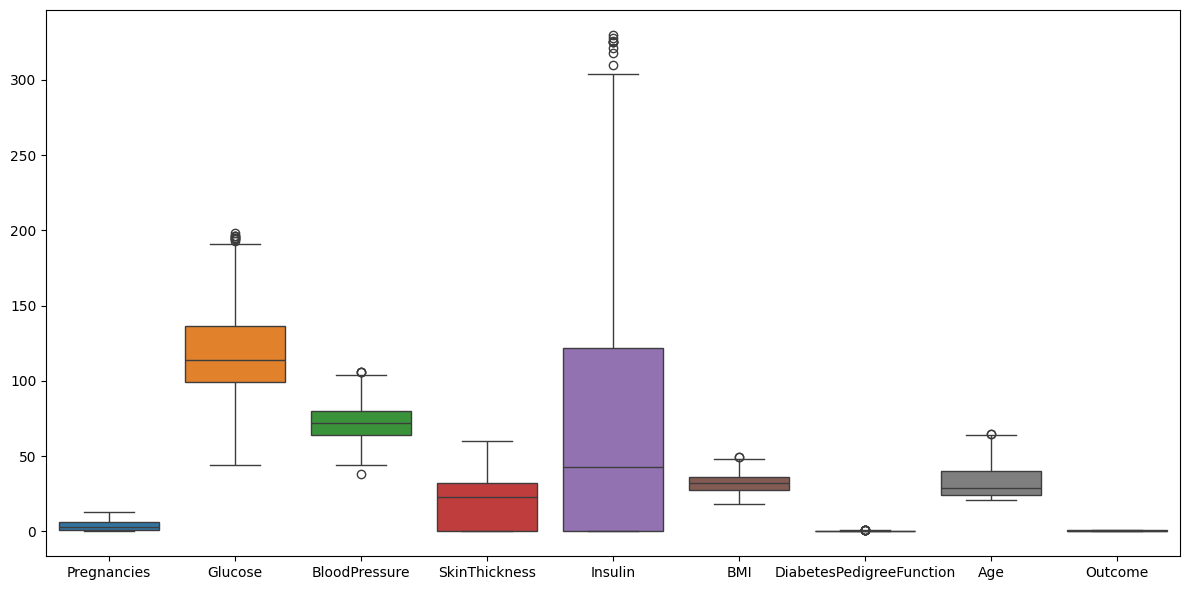

In [31]:
# Ïù¥ÏÉÅÏπò ÏßÅÏ†ë Ï†úÍ±∞ (BloodPressure/ BMI / Age)
cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',  'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

def remove_outlier(df) :
  df_cleaned = df.copy()
  for x in cols :
    q1 = df_cleaned[x].quantile(0.25)
    q3 = df_cleaned[x].quantile(0.75)
    iqr = q3 - q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr


    df_cleaned = df_cleaned[(df_cleaned[x] >= lower) & (df_cleaned[x] <= upper)]

  return df_cleaned.reset_index(drop = True)


after_iqr = remove_outlier(df)

plt.figure(figsize=(12, 6))
sns.boxplot(after_iqr)
plt.tight_layout()


#### 1.3 ÏïûÏÑ† Îëê Îã®Í≥ÑÏóêÏÑú ÏñªÏùÄ Ìñ•ÌõÑ Î∂ÑÏÑùÏãú Í≥†Î†§ÏÇ¨Ìï≠ ÏûëÏÑ±

In [32]:
print("""
IQR Î•º ÌÜµÌï¥ ÏÉÅÌïú/ÌïòÌïúÏùÑ Ï†ÅÏö©ÌïòÏó¨ Ïù¥ÏÉÅÏπò Ï†úÍ±∞Î•º Ìïú Í≤∞Í≥º Í∑πÎã®Ï†ÅÏù¥ Í∞íÎì§ÏùÄ ÏÇ¨ÎùºÏ°åÎã§.
ÌïòÏßÄÎßå ÏïÑÏßÅ Glucose, Insuline Í≥º Í∞ôÏùÄ Ïª¨ÎüºÏùÄ Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑÏùò Í∑πÎã®Ï†ÅÏù∏ Í∞íÎì§Ïù¥ Ï°¥Ïû¨ÌïòÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïó¨ÏßÑÎã§.
Ïù¥Îäî Ïã§Ï†ú Ïª¨Îüº Í∞íÏù¥ Ï†ÅÏ†àÌïú Í∞íÏù∏ÏßÄ ÎèÑÎ©îÏù∏ Ï†ÑÎ¨∏Í∞ÄÏôÄ ÎÖºÏùòÍ∞Ä ÌïÑÏöîÌï¥Î≥¥Ïù∏Îã§.
""")


IQR Î•º ÌÜµÌï¥ ÏÉÅÌïú/ÌïòÌïúÏùÑ Ï†ÅÏö©ÌïòÏó¨ Ïù¥ÏÉÅÏπò Ï†úÍ±∞Î•º Ìïú Í≤∞Í≥º Í∑πÎã®Ï†ÅÏù¥ Í∞íÎì§ÏùÄ ÏÇ¨ÎùºÏ°åÎã§. 
ÌïòÏßÄÎßå ÏïÑÏßÅ Glucose, Insuline Í≥º Í∞ôÏùÄ Ïª¨ÎüºÏùÄ Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑÏùò Í∑πÎã®Ï†ÅÏù∏ Í∞íÎì§Ïù¥ Ï°¥Ïû¨ÌïòÎäî Í≤ÉÏúºÎ°ú Î≥¥Ïó¨ÏßÑÎã§. 
Ïù¥Îäî Ïã§Ï†ú Ïª¨Îüº Í∞íÏù¥ Ï†ÅÏ†àÌïú Í∞íÏù∏ÏßÄ ÎèÑÎ©îÏù∏ Ï†ÑÎ¨∏Í∞ÄÏôÄ ÎÖºÏùòÍ∞Ä ÌïÑÏöîÌï¥Î≥¥Ïù∏Îã§. 



‚úÖ 1Î≤à Î¨∏Ï†ú Îç∞Ïù¥ÌÑ∞ Ï∞∏Í≥†ÌïòÏó¨

    üîé 2.1 Ïò§Î≤ÑÏÉòÌîåÎßÅ Í≥ºÏ†ï ÏÑ§Î™ÖÌïòÍ≥† Í≤∞Í≥º ÏûëÏÑ±
    üîé 2.2 Ïñ∏ÎçîÏÉòÌîåÎßÅ Í≥ºÏ†ï ÏÑ§Î™ÖÌïòÍ≥† Í≤∞Í≥º ÏûëÏÑ±
    üîé 2.3 Îëò Ï§ë ÌïòÎÇòÎ•º ÏÑ†ÌÉùÌïòÍ≥† Ïù¥Ïú† ÏÑ§Î™Ö

#### üìåÏò§Î≤Ñ ÏÉòÌîåÎßÅ
     Ïò§Î≤Ñ ÏÉòÌîåÎßÅÏùÄ ÏÜåÏàò ÌÅ¥ÎûòÏä§Ïùò Îç∞Ïù¥ÌÑ∞Î•º ÎäòÎ†§, Í∑†ÌòïÏùÑ ÎßûÏ∂îÎäî Í∏∞Î≤ï

     Ïò§Î≤Ñ ÏÉòÌîåÎßÅ Ï¢ÖÎ•ò
     1. ÎûúÎç§ Ïò§Î≤Ñ ÏÉòÌîåÎßÅ : ÏÜåÏàò ÌÅ¥ÎûòÏä§Î•º Îã®Ïàú Î≥µÏ†ú
     2. SMOTE : KNNÎ•º ÏÇ¨Ïö©Ìï¥ Í∞ÄÏÉÅÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏÉùÏÑ±/ Îã®Ïàú Î≥µÏ†úÍ∞Ä ÏïÑÎãàÍ∏∞ ÎïåÎ¨∏Ïóê Í≥ºÏ†ÅÌï© Î∞©ÏßÄ
     3. ADASYN : SMOTEÏôÄ Ïú†ÏÇ¨ÌïòÏßÄÎßå, Í∞ÄÍπåÏö¥ ÏÉòÌîåÏù¥ Ï†ÅÏùÄ Îç∞Ïù¥ÌÑ∞Ïóê Ï¥àÏ≤®ÏùÑ ÎßûÏ∂§

#### üìåÏñ∏Îçî ÏÉòÌîåÎßÅ
     Ïñ∏Îçî ÏÉòÌîåÎßÅÏùÄ Îã§ÏàòÏùò ÌÅ¥ÎûòÏä§Î•º Ï§ÑÏó¨ ÏÜåÏàò ÌÅ¥ÎûòÏä§ÏôÄ, Í∑†ÌòïÏùÑ ÎßûÏ∂îÎäî Í∏∞Î≤ï

     Ïò§Î≤Ñ ÏÉòÌîåÎßÅ Ï¢ÖÎ•ò
     1. ÎûúÎç§ Ïò§Î≤Ñ ÏÉòÌîåÎßÅ : Îã§Ïàò ÌÅ¥ÎûòÏä§Î•º Î¨¥ÏûëÏúÑÎ°ú Ï†úÍ±∞
     2. Tomek Links : Îëê ÌÅ¥ÎûòÏä§Ïùò Í∞ÄÏû• Í∞ÄÍπåÏö¥ ÏÉòÌîå ÏåçÏùÑ Ï†úÍ±∞
     3. NearMiss : Îã§Ïàò ÌÅ¥ÎûòÏä§ Ï§ë ÏÜåÏàò ÌÅ¥ÎûòÏä§ÏôÄ Í∞ÄÏû• Í∞ÄÍπåÏö¥ ÏÉòÌîåÎßå ÎÇ®ÍπÄ

In [40]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Îç∞Ïù¥ÌÑ∞ Î≥µÏÇ¨
df2 = after_iqr.copy()


X = df.drop(columns = ['Outcome'], axis = 1)
y = df['Outcome']

print(y.value_counts())

# 1) Over Samping
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

over = RandomOverSampler()
over_x, over_y = over.fit_resample(X, y)

print("Over Sampling Í≤∞Í≥º")
print(Counter(over_y))


# 2) Under Samping
from imblearn.under_sampling  import RandomUnderSampler

under = RandomUnderSampler(random_state = 42)
under_x , under_y = under.fit_resample(X, y)

print("under Sampling Í≤∞Í≥º")
print(Counter(under_y))


print("""
Ïñ∏Îçî ÏÉòÌîåÎßÅ ÏÇ¨Ïö©Ïãú, 268Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Îç∞Ïù¥ÌÑ∞ ÏÜêÏã§Ïù¥ ÌÅ¨Îã§.
Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßéÏùÑ ÏàòÎ°ù Î™®Îç∏Ïù¥ Ìå®ÌÑ¥ÏùÑ ÌïôÏäµÌï† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ïò§Î≤Ñ ÏÉòÌîåÎßÅÏùÑ ÏÑ†ÌÉùÌïúÎã§.
""")

Outcome
0    500
1    268
Name: count, dtype: int64
Over Sampling Í≤∞Í≥º
Counter({1: 500, 0: 500})
under Sampling Í≤∞Í≥º
Counter({0: 268, 1: 268})

Ïñ∏Îçî ÏÉòÌîåÎßÅ ÏÇ¨Ïö©Ïãú, 268Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÍ∏∞ ÎïåÎ¨∏Ïóê Îç∞Ïù¥ÌÑ∞ ÏÜêÏã§Ïù¥ ÌÅ¨Îã§.
Îç∞Ïù¥ÌÑ∞Í∞Ä ÎßéÏùÑ ÏàòÎ°ù Î™®Îç∏Ïù¥ Ìå®ÌÑ¥ÏùÑ ÌïôÏäµÌï† Ïàò ÏûàÍ∏∞ ÎïåÎ¨∏Ïóê Ïò§Î≤Ñ ÏÉòÌîåÎßÅÏùÑ ÏÑ†ÌÉùÌïúÎã§. 



‚úÖ 3-1 ÏµúÏÜå 3Í∞ú Ïù¥ÏÉÅ ÏïåÍ≥†Î¶¨Ï¶ò Ï†úÏãúÌïòÍ≥† Ï†ïÌôïÎèÑ Ï∏°Î©¥Ïùò Î™®Îç∏ 1Í∞úÏôÄ ÏÜçÎèÑ Ï∏°Î©¥Ïùò Î™®Îç∏ 1Í∞úÎ•º Íº≠ Íµ¨ÌòÑ(Ï¥ù 2Í∞ú Ïù¥ÏÉÅ)

1) Logistic Ïû•Ï†ê

    * Ìï¥ÏÑùÏùò Ïö©Ïù¥ÏÑ±
    * Îπ†Î•∏ Ïó∞ÏÇ∞ ÏÜçÎèÑ
    * Ï†ïÍ∑úÌôî Í∏∞Î≤ï -> L1, L2, Í∑úÏ†úÎ•º ÏÇ¨Ïö©ÌïòÏó¨ Í≥ºÏ†ÅÌï© Î∞©ÏßÄ Í∞ÄÎä•

2) ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ (Random Forest)

    * Ïó¨Îü¨ Í∞úÏùò ÏùòÏÇ¨Í≤∞Ï†ïÎÇòÎ¨¥ÏùÑ ÏïôÏÉÅÎ∏î Î∞©ÏãùÏúºÎ°ú Í≤∞Ìï© / Îã§ÏàòÍ≤∞ Î∞©ÏãùÏúºÎ°ú ÏµúÏ¢Ö Î∂ÑÎ•ò Í≤∞Ï†ï
    * Í≥ºÏ†ÅÌï© Î∞©ÏßÄ : Ïó¨Îü¨ Ìä∏Î¶¨ Ï°∞Ìï©ÏúºÎ°ú ÏùºÎ∞òÌôî ÏÑ±Îä• Ïö∞Ïàò
    * Î≥ÄÏàò Ï§ëÏöîÎèÑ ÌèâÍ∞Ä Í∞ÄÎä•

3) SVM

    * Í≥†Ï∞®Ïõê Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÏÑ±Îä• Ïö∞Ïàò
    * Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ÅÏùÑÎñÑ Í≥ºÏ†ÅÌï© ÏóÜÏù¥ ÌïôÏäµ Í∞ÄÎä•
    * Ïª§ÎÑê Ìä∏Î¶≠ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Î≥µÏû°Ìïú Ìå®ÌÑ¥ÎèÑ ÌïôÏäµ Í∞ÄÎä•


‚úÖ 3-2 Î™®Îç∏ ÎπÑÍµêÌïòÍ≥† Í≤∞Í≥º ÏÑ§Î™Ö

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import time

over_x, over_y

# Data Scacling Ï§ÄÎπÑ
ss = StandardScaler()
scaled_x = pd.DataFrame(ss.fit_transform(over_x) , columns = over_x.columns)

# scaled_x, over_y
final_x = scaled_x.copy()
final_y = over_y.copy()


X_train, X_test, y_train, y_test = train_test_split(final_x, final_y, test_size = 0.3, random_state = 42)


models = {
    'LR' : LogisticRegression() ,
    'RF' : RandomForestClassifier(),
    'SVM' : SVC()

}


res = []
for name, model in models.items() :
  start_time = time.time()
  model.fit(X_train, y_train)
  end_time = time.time()

  pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  res.append([name, (end_time - start_time), accuracy, f1])

result = pd.DataFrame(res, columns = ['Models','Time','Accuracy_score', 'F1_score'])
print(result)

print("""
Î°úÏßÄÏä§Ìã±, ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏, SVM Ïóê ÎåÄÌïú Î™®Îç∏ ÌèâÍ∞ÄÎ•º ÏúÑÌï¥ ÏïÑÎûò 3Í∞ÄÏßÄÏùò ÏßÄÌëúÎ•º ÏÑ†ÌÉùÌï®
Accuracy_Score : Îç∞Ïù¥ÌÑ∞ Ï§ë Ïò¨Î∞îÎ•¥Í≤å Î∂ÑÎ•òÎêú ÎπÑÏú®
F1-score: Ï†ïÎ∞ÄÎèÑ Ïû¨ÌòÑÏú®ÏùÑ Í∑†ÌòïÏûàÍ≤å Î∞òÏòÅÌïòÎäî ÏßÄÌëú
TIME : Î™®Îç∏Ïùò ÌïôÏäµ Î∞è ÏòàÏ∏° ÏÜçÎèÑ

Ï†ïÌôïÎèÑÏôÄ F1_ScoreÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ÏùÑ ÏÑ†ÌÉùÌïúÎã§.
""")

  Models      Time  Accuracy_score  F1_score
0     LR  0.015006        0.786667  0.790850
1     RF  1.047541        0.830000  0.838095
2    SVM  0.091799        0.780000  0.793750

Î°úÏßÄÏä§Ìã±, ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏, SVM Ïóê ÎåÄÌïú Î™®Îç∏ ÌèâÍ∞ÄÎ•º ÏúÑÌï¥ ÏïÑÎûò 3Í∞ÄÏßÄÏùò ÏßÄÌëúÎ•º ÏÑ†ÌÉùÌï®
Accuracy_Score : Îç∞Ïù¥ÌÑ∞ Ï§ë Ïò¨Î∞îÎ•¥Í≤å Î∂ÑÎ•òÎêú ÎπÑÏú® 
F1-score: Ï†ïÎ∞ÄÎèÑ Ïû¨ÌòÑÏú®ÏùÑ Í∑†ÌòïÏûàÍ≤å Î∞òÏòÅÌïòÎäî ÏßÄÌëú
TIME : Î™®Îç∏Ïùò ÌïôÏäµ Î∞è ÏòàÏ∏° ÏÜçÎèÑ 

Ï†ïÌôïÎèÑÏôÄ F1_ScoreÍ∞Ä Í∞ÄÏû• ÎÜíÏùÄ ÎûúÎç§ Ìè¨Î†àÏä§Ìä∏ Î™®Îç∏ÏùÑ ÏÑ†ÌÉùÌïúÎã§.



‚úÖ  3-3 ÏÜçÎèÑ Í∞úÏÑ†ÏùÑ ÏúÑÌïú Ï∞®Ïõê Ï∂ïÏÜå ÏÑ§Î™ÖÌïòÍ≥† ÏàòÌñâ, ÏòàÏ∏° ÏÑ±Îä•Í≥º ÏÜçÎèÑ ÎπÑÍµêÌïòÍ≥† Í≤∞Í≥º ÏûëÏÑ±

PC_0       PC_1       PC_2       PC_3       PC_4       PC_5  \
Ratio   21.844924  16.057278  13.803510  12.455654  10.767682  10.142267   
Cumsum  21.844924  37.902202  51.705712  64.161366  74.929049  85.071315   

             PC_6        PC_7  
Ratio    9.488598    5.440087  
Cumsum  94.559913  100.000000

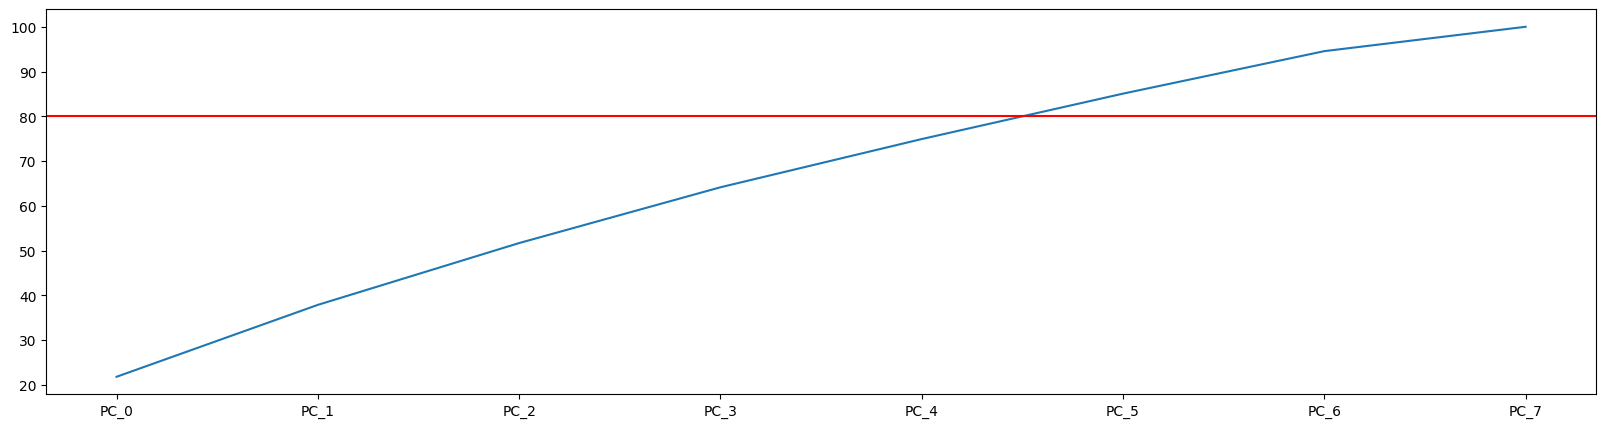

In [58]:
from sklearn.decomposition import PCA

#  final_x
pca = PCA()
pca.fit(final_x )


pca_df = pd.DataFrame({
    'Ratio' : pca.explained_variance_ratio_ * 100,
    'Cumsum' : pca.explained_variance_ratio_.cumsum() * 100

})

pca_df.index = ['PC_' + str(x) for x in range(len(pca_df.index))]
display(pca_df.T)

plt.figure(figsize = (20, 5))
plt.plot(pca_df['Cumsum'])
plt.axhline(80, color = 'r')

print("""
PC_5 Í∞Ä Ï†ÑÏ≤¥ Î∂ÑÏÇ∞Ïùò 80%Ïù¥ÏÉÅÏùÑ ÏÑ§Î™ÖÌïòÍ∏∞ ÎïåÎ¨∏Ïóê 5Í∞úÏùò Ï£ºÏÑ±Î∂ÑÏùÑ ÏÑ†ÌÉùÌïúÎã§.
""")


In [63]:

# PCA_5 Í∞ú
pca = PCA(n_components= 5)
pca_5_final_x = pca.fit_transform(final_x )

pca_5_final_x = pd.DataFrame(pca_5_final_x, columns = ['PC1', 'PC2', 'PC3', 'PC4','PC5'])

# Îç∞Ïù¥ÌÑ∞ Ïû¨Íµ¨ÏÑ±
pca_x = pca_5_final_x.copy()
pca_y = final_y.copy()


X_train, X_test, y_train, y_test = train_test_split(pca_x, pca_y, test_size = 0.3, random_state = 42)


models = {
    'LR' : LogisticRegression() ,
    'RF' : RandomForestClassifier(),
    'SVM' : SVC()

}


res = []
for name, model in models.items() :
  start_time = time.time()
  model.fit(X_train, y_train)
  end_time = time.time()

  pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  res.append([name, (end_time - start_time), accuracy, f1])

pca_result = pd.DataFrame(res, columns = ['Models','Time','Accuracy_score', 'F1_score'])
print("PCA Ï∞®Ïõê Ï∂ïÏÜå Ï†Ñ")
print(result)
print("")
print("PCA Ï∞®Ïõê Ï∂ïÏÜå ÌõÑ")
print(pca_result)



PCA Ï∞®Ïõê Ï∂ïÏÜå Ï†Ñ
  Models      Time  Accuracy_score  F1_score
0     LR  0.015006        0.786667  0.790850
1     RF  1.047541        0.830000  0.838095
2    SVM  0.091799        0.780000  0.793750

PCA Ï∞®Ïõê Ï∂ïÏÜå ÌõÑ
  Models      Time  Accuracy_score  F1_score
0     LR  0.006856        0.793333  0.797386
1     RF  0.545711        0.810000  0.815534
2    SVM  0.027533        0.750000  0.773414


#### ‚úÖÎ¨∏Ï†ú 4
Í∏àÏÜç ÏÑ±Î∂Ñ Ìï®Ïú†Îüâ Îç∞Ïù¥ÌÑ∞(Î≥ÄÏàò 1Í∞ú) - Ï†úÌíàÏóê Í∏àÏÜç Ïû¨Ïßà Ìï®Ïú†ÎüâÏùò Î∂ÑÏÇ∞Ïù¥ 1.3ÏùÑ ÎÑòÏúºÎ©¥ Î∂àÎüâÏù¥ÎùºÍ≥† Î≥¥Í≥† ÏûàÎäîÎç∞ Ï†úÏ°∞ÏÇ¨Î≥ÑÎ°ú Ï∞®Ïù¥Í∞Ä ÎÇúÎã§Í≥† Ï†úÎ≥¥Î•º Î∞õÏïòÏúºÎ©∞, Î∂ÑÏÇ∞Ïóê ÎåÄÌï¥ Í≤ÄÏ†ïÏùÑ ÏàòÌñâÌïòÏãúÏò§. (Ïú†ÏùòÌôïÎ•† 0.05)

In [77]:
import pandas as pd
import scipy.stats as stats

df= pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/content.csv')
df.head()

print("""
Í∑ÄÎ¨¥ Í∞ÄÏÑ§ : Í∏àÏÜç Ïû¨Ïßà Ìï®Ïú†ÎüâÏùò Î∂ÑÏÇ∞Ïù¥ 1.3Ïù¥Îã§.
ÎåÄÎ¶Ω Í∞ÄÏÑ§ : Í∏àÏÜç Ïû¨Ïßà Ìï®Ïú†ÎüâÏùò Î∂ÑÏÇ∞Ïù¥ 1.3Í∞Ä ÏïÑÎãàÎã§.

""")

alpha = 0.5
target_var =1.3

sample_var = np.var(df['content'], ddof = 1)
n = len(df['content'])

# Ïπ¥Ïù¥Ï†úÍ≥± ÌÜµÍ≥ÑÎüâ
chi2_stat = (n-1) * sample_var / target_var
p_val = 1 - stats.chi2.cdf(chi2_stat, df = n - 1)

if p_val < alpha:
        print("‚ùå Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å: Î∂àÎüâ Í∞ÄÎä•ÏÑ± ÏûàÏùå!\n")
else:
        print("‚úÖ Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù: ÌóàÏö© Î≤îÏúÑ ÎÇ¥ Î∂ÑÏÇ∞\n")


Í∑ÄÎ¨¥ Í∞ÄÏÑ§ : Í∏àÏÜç Ïû¨Ïßà Ìï®Ïú†ÎüâÏùò Î∂ÑÏÇ∞Ïù¥ 1.3Ïù¥Îã§. 
ÎåÄÎ¶Ω Í∞ÄÏÑ§ : Í∏àÏÜç Ïû¨Ïßà Ìï®Ïú†ÎüâÏùò Î∂ÑÏÇ∞Ïù¥ 1.3Í∞Ä ÏïÑÎãàÎã§. 


‚ùå Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å: Î∂àÎüâ Í∞ÄÎä•ÏÑ± ÏûàÏùå!



In [74]:
import numpy as np
from scipy.stats import chi2 # ÏñëÏ∏° Í≤ÄÏ†ïÏù¥Îùº 2Ïù∏Í∞Ä

def var_test(x, va0, direction = 'two-tailed', alpha = 0.05):
    # x : df
    # va0 : ÎπÑÍµêÌïòÍ≥†Ïûê ÌïòÎäî Í∞íÏúºÎ°ú Ïó¨Í∏∞ÏÑúÎäî 1.3
    # alpha : Ïú†ÏùòÏàòÏ§Ä
    n = len(x)
    Q = (n-1) * np.var(x) / va0
    print("direction : ", direction)
    if direction  == 'lower':
        q = chi2.ppf(alpha, n-1)
        if Q <= q:
            return "Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å"
        else:
            return "Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù"
    elif direction  == 'upper':
        q = chi2.ppf(1-alpha, n-1)
        if Q >= q:
            return "Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å"
        else:
            return "Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù"
    else:
        q1 = chi2.ppf(alpha/2, n-1)
        q2 = chi2.ppf(1-(alpha/2), n-1)
        print('Q', Q)
        print('q1', q1)
        print('q2', q2)
        if Q <= q1 or Q >= q2:
            return "Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å"
        else:
            return "Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù"

var_test(df['content'], va0 = 1.3)

direction :  two-tailed
Q 326.6508365405755
q1 161.82618239364686
q2 239.9596818276442


'Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å'

#### ‚úÖ Î¨∏Ï†ú 5
LotÎ≥Ñ 200Í∞úÏóê ÎåÄÌïú Î∂àÎüâ Ï†úÌíà ÏàòÎüâ Îç∞Ïù¥ÌÑ∞(Î≥ÄÏàò 2Í∞ú - lotÎ≤àÌò∏, Î∂àÎüâÏ†úÌíàÏàò)

* 5.1 Î∂àÎüâÎ•† Í¥ÄÎ¶¨ÎèÑÏóê Îî∞Îùº Í¥ÄÎ¶¨Ï§ëÏã¨ÏÑ†(CL : Center Line), Í¥ÄÎ¶¨ ÏÉÅÌïúÏÑ†(UCL : Upper Control Limit), ÌïòÌïúÏÑ†(LCL : Lower Control Limit)

* 5.2 Í¥ÄÎ¶¨ÎèÑ ÏãúÍ∞ÅÌôî

0.029024320840935338


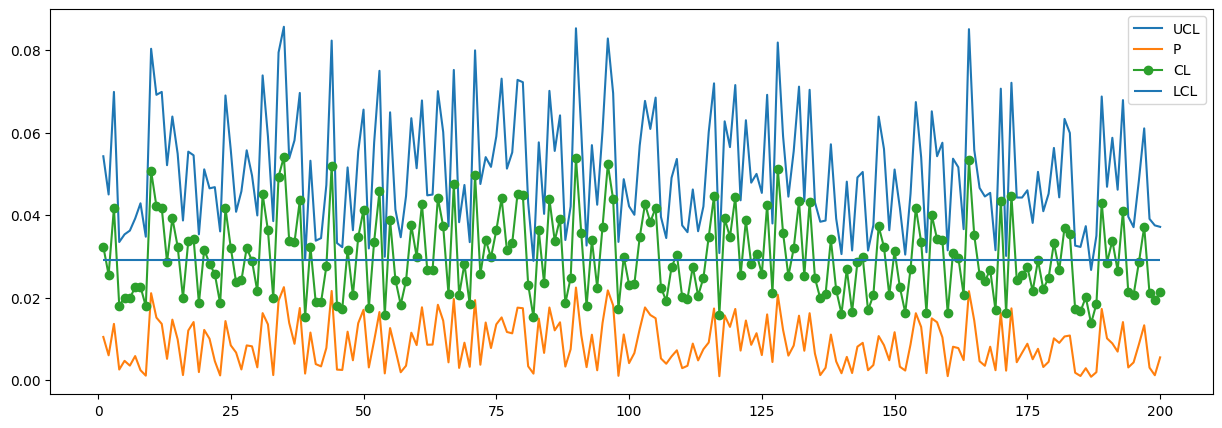

In [92]:
import pandas as pd

df= pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/refs/heads/main/data/lot_quality.csv')
df.head()

# p Í¥ÄÎ¶¨ Íµ¨ÌïòÎäî Î∞©Î≤ï
# n = lot Î≥Ñ ÏÉùÏÇ∞ ÏàòÎüâ
# p = lot Î≥Ñ Î∂àÎüâ ÏàòÎüâ
# CL = Ï†ÑÏ≤¥ Î∂àÎüâ ÏàòÎüâ / Ï†ÑÏ≤¥ ÏÉùÏÇ∞ ÏàòÎüâ

# lot Ïù∏Îç±Ïä§
df2 = df.set_index('lot')

# Î∂àÎüâ / ÏÉùÏÇ∞
df2['p'] =  df2['Î∂àÎüâÏàòÎüâ']/ df2['ÏÉùÏÇ∞ÏàòÎüâ']

# UCL
df2['UCL'] = df2['p'] + (3 * (df2['p'] * ( 1 - df2['p']) / df2['ÏÉùÏÇ∞ÏàòÎüâ']) ** 0.5)
df2['LCL'] = df2['p'] - (3 * (df2['p'] * ( 1 - df2['p']) / df2['ÏÉùÏÇ∞ÏàòÎüâ']) ** 0.5)


# Í¥ÄÎ¶¨ Ï§ëÏã¨ÏÑ†
CL = df2['Î∂àÎüâÏàòÎüâ'].sum() / df2['ÏÉùÏÇ∞ÏàòÎüâ'].sum()
print(CL)


# ÏãúÍ∞ÅÌôî
plt.figure(figsize = (15,5))
plt.plot(df2['UCL'])
plt.plot(df2['LCL'])
plt.plot(df2['p'], marker = 'o')
plt.hlines(CL, 1, 200)
plt.legend(['UCL','P','CL','LCL'])

‚úÖ Î¨∏Ï†ú 6
* 4.ÏÉÅÌíà aÏôÄ bÍ∞Ä ÏûàÏùÑ Îïå Îã§ÏùåÍ≥º Í∞ôÏùÄ Íµ¨Îß§ Ìå®ÌÑ¥Ïù¥ ÏûàÎã§Í≥† Ìï®.
* 4.1 Íµ¨Îß§ÌïòÎäî Ìå®ÌÑ¥ÏúºÎ°ú Î¥êÏÑú Îëê ÏÉÅÌíàÏù¥ Ïó∞Í¥ÄÏù¥ ÏûàÎäîÏßÄ Í∞ÄÏÑ§ ÏÑ∏Ïö∞Í≥† Í≤ÄÏ†ïÌïòÏãúÏò§
* 4.2 Ïó∞Íµ¨Í∞ÄÏÑ§ Í∑ÄÎ¨¥Í∞ÄÏÑ§ ÏÑ∏Ïö∞ÏãúÏò§
* 4.3 Í∞ÄÏÑ§ Ï±ÑÌÉùÌïòÏãúÏò§

In [98]:
from statsmodels.sandbox.stats.runs  import runstest_1samp

data = ['a','a','b','b','a','a','a','a','b','b','b','b','b','a','a','b','b','a','b','b']

df = pd.DataFrame(data, columns = ['value'])

# Í∞ÄÏÑ§ Í≤ÄÏ†ï
# Í∑ÄÎ¨¥ : Í¥ÄÏ∏°Í∞íÏù¥ ÏûÑÏùòÏ†ÅÏù¥Îã§ = Ïó∞Í¥ÄÏÑ±Ïù¥ ÏóÜÎã§
# ÎåÄÎ¶Ω : Í≥ΩÏ∏°Í∞íÏù¥ ÏûÑÏùòÏ†ÅÏù¥ ÏïÑÎãàÎã§ - Ïó∞Í¥ÄÏÑ±Ïù¥ ÏûàÎã§.


df['value'] = df['value'].apply(lambda x : 1 if x == 'a' else 0)

z_stat, p_val = runstest_1samp(df)

if p_val < 0.05 :
  print("Í∑ÄÎ¨¥Í∞ÄÏÑ§ Í∏∞Í∞Å : Ïó∞Í¥ÄÏÑ±Ïù¥ ÏûàÎã§")
else :
  print("Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù : Ïó∞Í¥ÄÏÑ±Ïù¥ ÏóÜÎã§")

Í∑ÄÎ¨¥Í∞ÄÏÑ§ Ï±ÑÌÉù : Ïó∞Í¥ÄÏÑ±Ïù¥ ÏóÜÎã§
